In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11046 non-null  object 
 1   Model              11046 non-null  object 
 2   Year               11046 non-null  int64  
 3   Engine Fuel Type   11046 non-null  object 
 4   Engine HP          11046 non-null  float64
 5   Engine Cylinders   11046 non-null  float64
 6   Transmission Type  11046 non-null  object 
 7   Driven_Wheels      11046 non-null  object 
 8   Number of Doors    11046 non-null  float64
 9   Vehicle Size       11046 non-null  object 
 10  Vehicle Style      11046 non-null  object 
 11  MSRP               11046 non-null  int64  
 12  Avg. MPG           11046 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe(include='object')

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11046,11046,11046,11046,11046,11046,11046
unique,39,794,9,4,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1113,156,7024,7792,4579,4368,2812


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,MSRP,Avg. MPG
count,11046.000000,11046.00000,11046.000000,11046.000000,11046.000000,11046.000000
mean,2010.137063,235.37820,5.466323,3.473927,30446.005522,22.758827
std,7.743702,87.66891,1.450401,0.860058,18718.470974,5.148163
min,1990.000000,55.00000,3.000000,2.000000,2000.000000,11.500000
25%,2006.000000,170.00000,4.000000,3.000000,20275.000000,19.000000
50%,2014.000000,220.00000,6.000000,4.000000,29095.000000,22.000000
75%,2016.000000,290.00000,6.000000,4.000000,39638.750000,26.000000
max,2017.000000,707.00000,12.000000,4.000000,99950.000000,38.000000


<b>Before we do feature engineering, we better do a quick EDA on the data.</b>

First, check the data distribution from Avg. MPG columns

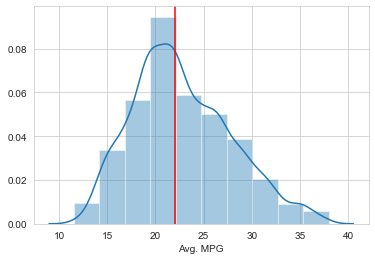

In [6]:
ax = sns.distplot(df['Avg. MPG'], bins=10)
ax.axvline(22, color='red')
plt.show()

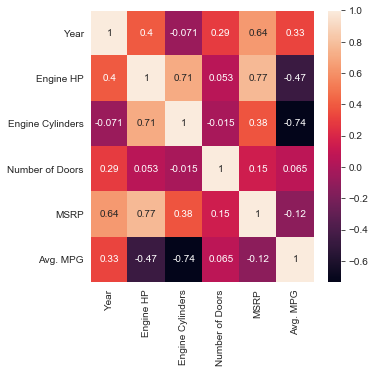

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

### MODELLING

In [8]:
learn_data = pd.get_dummies(df.drop('MSRP', axis=1), drop_first=True)
learn_data

,Year,Engine HP,Engine Cylinders,Number of Doors,Avg. MPG,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Buick,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,22.5,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,23.5,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,24.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,23.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,23.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11041,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11042,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11043,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11044,2013,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Engineering

In [9]:
X = learn_data
y = df['MSRP']

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X[['Engine HP','Engine Cylinders','Avg. MPG']] = scaler.fit_transform(X[['Engine HP','Engine Cylinders','Avg. MPG','Number of Doors']])

In [12]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  3., 10.])

In [13]:
X

,Year,Engine HP,Engine Cylinders,Number of Doors,Avg. MPG,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Buick,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,22.5,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,23.5,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,24.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,23.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,23.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11041,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11042,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11043,2012,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11044,2013,300.0,6.0,4.0,19.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Selection

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [15]:
models = [RandomForestRegressor,DecisionTreeRegressor,XGBRegressor, GradientBoostingRegressor]

In [16]:
def model_selection(X, y, names):
    model = names()
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    R2 = round(metrics.r2_score(y_test, prediction_test),4)*100
    return R2

In [17]:
score_all = []
for i in models:
    skor = model_selection(X, y, i)
    score_all.append(skor)

In [18]:
df_score = pd.DataFrame(score_all, columns = ['R2 Score'], index=['RandomForestRegressor','DecisionTreeRegressor','XGBRegressor','GradientBoostingRegressor'])
df_score.sort_values(by='R2 Score', ascending=False)

,R2 Score
XGBRegressor,96.30
RandomForestRegressor,96.26
DecisionTreeRegressor,95.49
GradientBoostingRegressor,91.39


From the R2 score we got the best score for the model is the XGB Regressor.

### Model Implementation with Random Forest Regressor

In [19]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
prediction_test = model.predict(X_test)

In [20]:
from sklearn import metrics
print(f'MAE      : {metrics.mean_absolute_error(y_test, prediction_test)}')
print(f'MSE      : {metrics.mean_squared_error(y_test, prediction_test)}')
print(f'RMSE     : {np.sqrt(metrics.mean_squared_error(y_test, prediction_test))}')
print(f'R2 Score : {round(metrics.r2_score(y_test, prediction_test),4)*100} %')

MAE      : 2256.6897373001752
MSE      : 12929291.886692697
RMSE     : 3595.7324548265124
R2 Score : 96.25 %


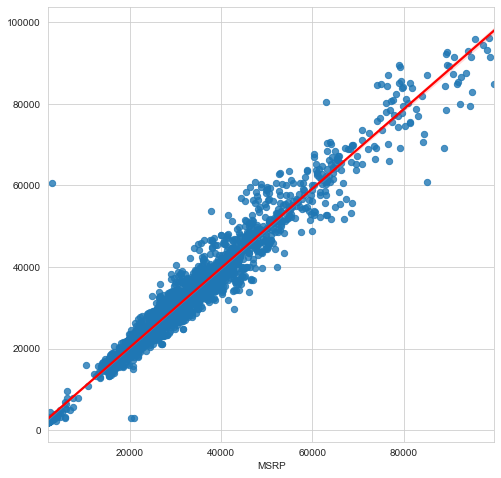

In [21]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction_test, scatter_kws={'s':40}, line_kws={'color':'red'})

<b>Feature Importances

In [32]:
ad = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importances'])
ad.sort_values(by='Importances', ascending=False).head(10)

,Importances
Engine HP,0.623514
Year,0.202930
Engine Fuel Type_premium unleaded (required),0.014461
Vehicle Style_4dr SUV,0.014188
Avg. MPG,0.012123
Engine Fuel Type_regular unleaded,0.009898
Engine Fuel Type_premium unleaded (recommended),0.008864
Make_Cadillac,0.008642
Vehicle Size_Midsize,0.005364
Vehicle Size_Large,0.004329


<b>Re-check

In [23]:
pred = model.predict(X_test.iloc[[5,6,7,8]])
real = y_test.iloc[[5,6,7,8]]
real - pred

4870     636.066667
3147    3087.923750
4418   -1226.745000
7813    -604.020000
Name: MSRP, dtype: float64

From the sample above, there is two car that has the price predicted over the actual price(minus value) and two car predicted below the actual price(non-minus value).